<a href="https://colab.research.google.com/github/NervOUs11/Predict_CocaCola_Stock/blob/main/Predict_KO_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# For use DataReader in pandas
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Import libraries
import math
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [27]:
#Get the stock quote
start = '2012-01-01'
end = '2022-06-25'
df = pdr.DataReader('KO', data_source='yahoo', start=start,end=end)
# show 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,35.355000,35.049999,35.075001,35.070000,15639600.0,25.261473
2012-01-04,35.035000,34.750000,34.955002,34.849998,14239200.0,25.103006
2012-01-05,34.935001,34.674999,34.880001,34.685001,14287600.0,24.984163
2012-01-06,34.814999,34.310001,34.735001,34.465000,13646600.0,24.825686
2012-01-09,34.584999,34.400002,34.500000,34.465000,10522600.0,24.825686
...,...,...,...,...,...,...
2022-06-17,60.130001,59.130001,59.700001,59.430000,34731500.0,59.430000
2022-06-21,60.880001,59.009998,59.490002,60.700001,17705000.0,60.700001
2022-06-22,61.450001,60.320000,60.599998,61.150002,15207100.0,61.150002


In [12]:
# Show price from last 7 days
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-15,60.639999,58.970001,60.000000,59.669998,19684700.0,59.669998
2022-06-16,59.520000,58.250000,58.639999,59.070000,15053800.0,59.070000
2022-06-17,60.130001,59.130001,59.700001,59.430000,34731500.0,59.430000
2022-06-21,60.880001,59.009998,59.490002,60.700001,17705000.0,60.700001
2022-06-22,61.450001,60.320000,60.599998,61.150002,15207100.0,61.150002
2022-06-23,61.910000,61.230000,61.299999,61.880001,17190900.0,61.880001
2022-06-24,63.060001,62.110001,62.110001,63.040001,18145700.0,63.040001


In [11]:
# Get the number of rows and columns in the data set
df.shape

(2637, 6)

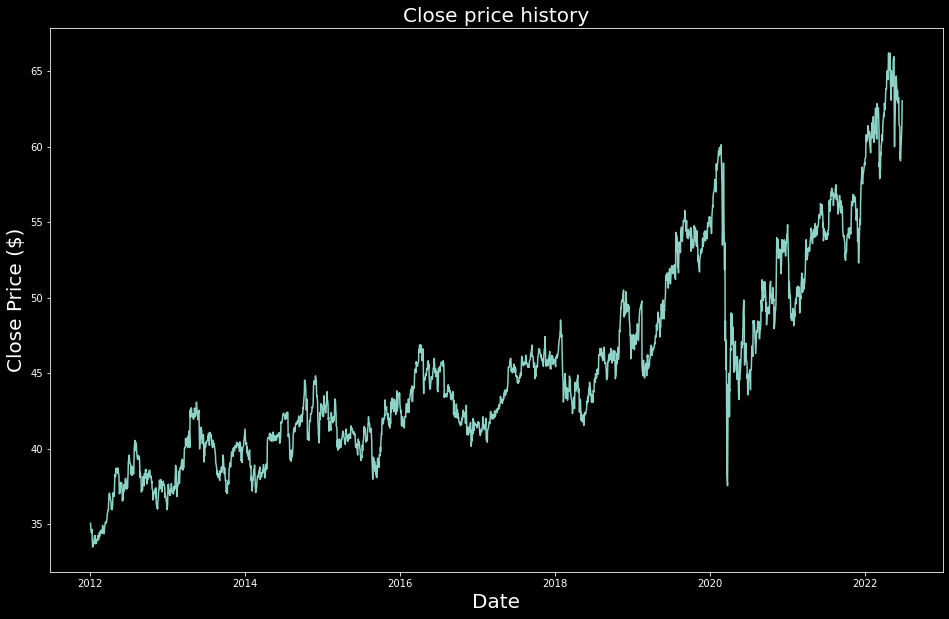

In [15]:
#Visualize the closing price
plt.figure(figsize=(16,10))
plt.style.use('dark_background')
plt.title('Close price history',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price ($)',fontsize=20)
plt.show()

In [25]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2110

In [29]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04814308],
       [0.0414183 ],
       [0.03637483],
       ...,
       [0.84533096],
       [0.86764487],
       [0.90310261]])

In [35]:
#Create the training date set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
 

[array([0.04814308, 0.0414183 , 0.03637483, 0.02965004, 0.02965004,
       0.03591622, 0.01635335, 0.00886446, 0.        , 0.00550207,
       0.00917008, 0.0070304 , 0.01681184, 0.02353662, 0.01390805,
       0.02200829, 0.01558924, 0.00687765, 0.00718327, 0.00825311,
       0.01314383, 0.01283821, 0.01665909, 0.01589486, 0.02384235,
       0.02047996, 0.01497789, 0.0145194 , 0.02216116, 0.02919156,
       0.0215498 , 0.0285802 , 0.03148411, 0.02796885, 0.03454076,
       0.03347092, 0.03071989, 0.02812172, 0.02842734, 0.04386371,
       0.03988997, 0.03347092, 0.03423514, 0.02705188, 0.02751036,
       0.03484638, 0.03851451, 0.04829594, 0.04982427, 0.04936579,
       0.05104698, 0.04844881, 0.05211682, 0.05502061, 0.06312097,
       0.06770595, 0.06877579, 0.07504209, 0.0745836 , 0.08665758])]
[0.10423352686863319]

[array([0.04814308, 0.0414183 , 0.03637483, 0.02965004, 0.02965004,
       0.03591622, 0.01635335, 0.00886446, 0.        , 0.00550207,
       0.00917008, 0.0070304 , 0.01